In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

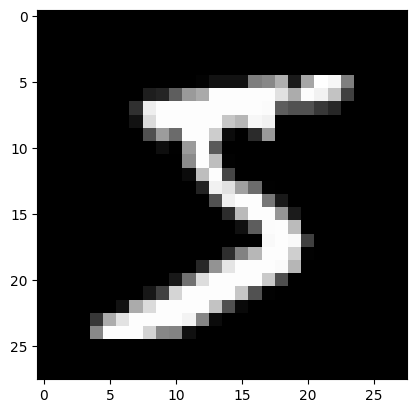

In [7]:
plt.imshow(x_train[0], cmap='gray')

In [8]:
x_train, x_test = x_train/255.0, x_test/255.0

In [9]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    ##layers.ELU(alpha=1.0)
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation="softmax")
])

C:\Anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
##optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7594 - loss: 0.7777
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9293 - loss: 0.2420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9432 - loss: 0.1932
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9493 - loss: 0.1737
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9528 - loss: 0.1618


In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%') 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9415 - loss: 0.1888
Test Accuracy: 94.75%


In [16]:
predictions = model.predict(x_test)
print(predictions)
print('Prediction Shape -', predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.5990546e-06 3.4441591e-08 1.9520814e-05 ... 9.9981028e-01
  3.2840992e-06 8.0389123e-05]
 [1.9677701e-04 2.3180693e-03 9.4855082e-01 ... 9.6731076e-09
  4.2781775e-04 3.1962482e-08]
 [8.9066110e-05 9.9367249e-01 8.0706098e-04 ... 1.2199804e-03
  7.1681628e-04 2.1413497e-04]
 ...
 [5.3269469e-11 2.0052134e-11 2.0434680e-11 ... 1.6396749e-06
  7.1234085e-06 2.6073726e-03]
 [1.8958119e-07 1.5112518e-06 3.7503417e-10 ... 4.7897392e-10
  9.6289489e-07 4.2347860e-08]
 [2.4851695e-06 1.6192352e-12 1.9904728e-06 ... 2.5089574e-13
  1.1523808e-08 2.0399375e-11]]
Prediction Shape - (10000, 10)


In [17]:
predictions[0]

array([1.5990546e-06, 3.4441591e-08, 1.9520814e-05, 8.3582374e-05,
       8.6653640e-10, 1.3779365e-06, 9.2810325e-12, 9.9981028e-01,
       3.2840992e-06, 8.0389123e-05], dtype=float32)

In [18]:
print(np.argmax(predictions[0]))

7


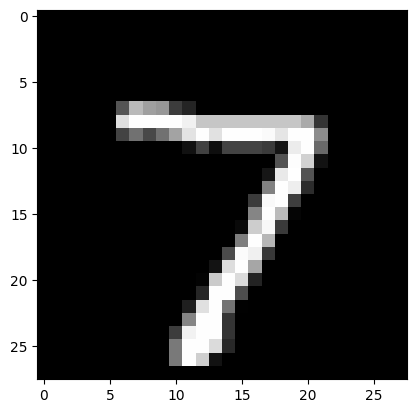

In [19]:
plt.imshow(x_test[0], cmap='gray')

True label: 9, Predicted label: 9


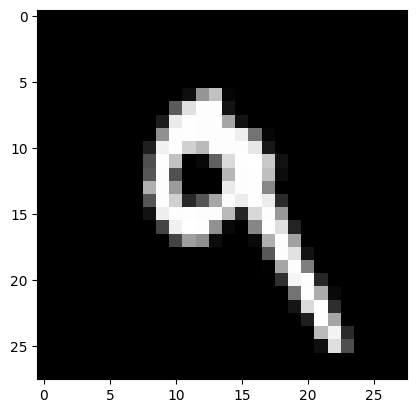

In [20]:
plt.imshow(x_test[7], cmap='gray')
print(f'True label: {y_test[7]}, Predicted label: {np.argmax(predictions[7])}')
plt.show()